Vahid Aslanzadeh 07/01/2015

# Example Dashboard

## plot 1
### Cross spectral density (CSD)

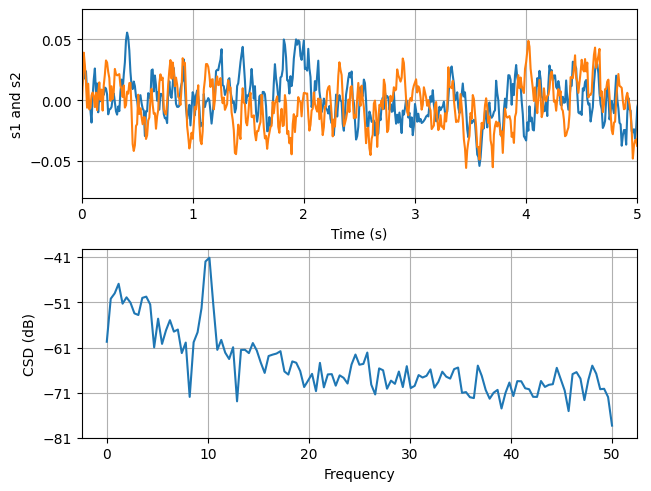

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained')

dt = 0.01
t = np.arange(0, 30, dt)

# Fixing random state for reproducibility
np.random.seed(19680801)


nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t / 0.05)

cnse1 = np.convolve(nse1, r, mode='same') * dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same') * dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2

ax1.plot(t, s1, t, s2)
ax1.set_xlim(0, 5)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('s1 and s2')
ax1.grid(True)

cxy, f = ax2.csd(s1, s2, NFFT=256, Fs=1. / dt)
ax2.set_ylabel('CSD (dB)')

plt.show()

## plot 2
### Plotting masked and NaN values

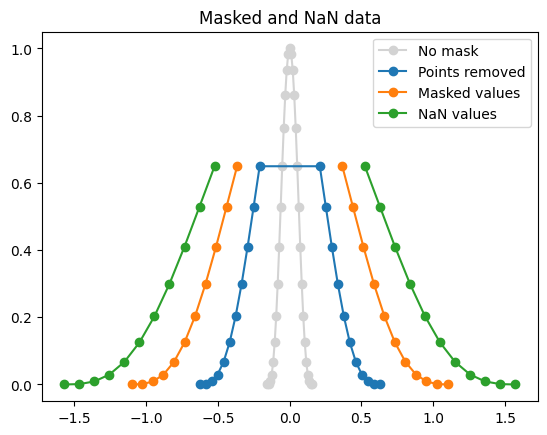

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-np.pi/2, np.pi/2, 31)
y = np.cos(x)**3

# 1) remove points where y > 0.7
x2 = x[y <= 0.7]
y2 = y[y <= 0.7]

# 2) mask points where y > 0.7
y3 = np.ma.masked_where(y > 0.7, y)

# 3) set to NaN where y > 0.7
y4 = y.copy()
y4[y3 > 0.7] = np.nan

plt.plot(x*0.1, y, 'o-', color='lightgrey', label='No mask')
plt.plot(x2*0.4, y2, 'o-', label='Points removed')
plt.plot(x*0.7, y3, 'o-', label='Masked values')
plt.plot(x*1.0, y4, 'o-', label='NaN values')
plt.legend()
plt.title('Masked and NaN data')
plt.show()

## plot 3
### hlines and vlines

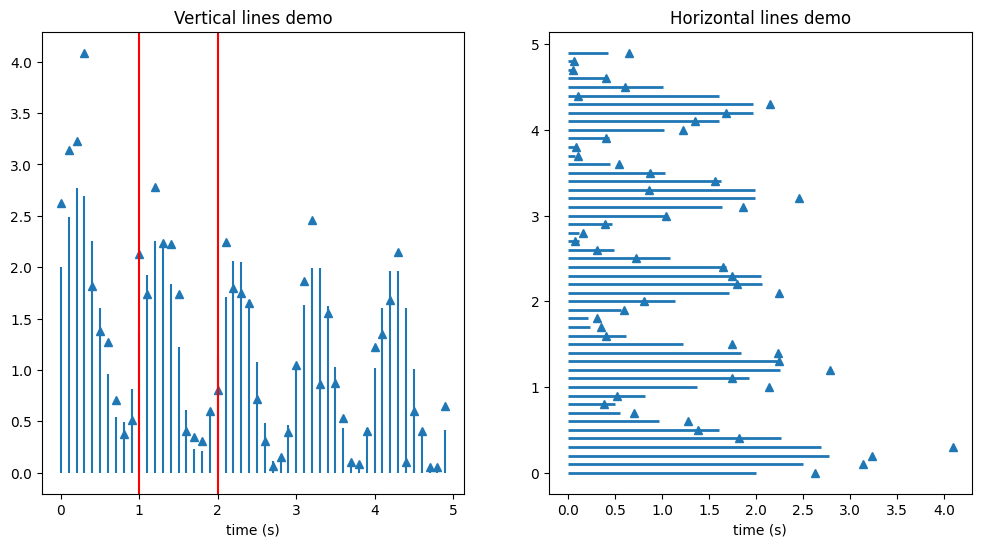

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

t = np.arange(0.0, 5.0, 0.1)
s = np.exp(-t) + np.sin(2 * np.pi * t) + 1
nse = np.random.normal(0.0, 0.3, t.shape) * s

fig, (vax, hax) = plt.subplots(1, 2, figsize=(12, 6))

vax.plot(t, s + nse, '^')
vax.vlines(t, [0], s)
# By using ``transform=vax.get_xaxis_transform()`` the y coordinates are scaled
# such that 0 maps to the bottom of the Axes and 1 to the top.
vax.vlines([1, 2], 0, 1, transform=vax.get_xaxis_transform(), colors='r')
vax.set_xlabel('time (s)')
vax.set_title('Vertical lines demo')

hax.plot(s + nse, t, '^')
hax.hlines(t, [0], s, lw=2)
hax.set_xlabel('time (s)')
hax.set_title('Horizontal lines demo')

plt.show()